In [41]:
from __future__ import absolute_import, division, print_function, unicode_literals

try:
  %tensorflow_version 2.x
except Exception:
  pass

In [42]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import numpy as np
from IPython.display import Image

# in order to always get the same result
tf.random.set_seed(1)
np.random.seed(1)

# Auto Encoder
Using Dense layer, we will compress MNIST to 3d vector so we can visualize it. This is called Auto Encoder design.

In [43]:
Image(url= "https://raw.githubusercontent.com/captainchargers/deeplearning/master/img/autoencoder1.png", width=500, height=250)

# Get MNIST Data

In [44]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# MNIST Preprocess

In [55]:
# we will use train data for auto encoder training
x_train = x_train.reshape(60000, 784)

# select only 300 test data for visualization
x_test = x_test[:300]
y_test = y_test[:300]
x_test = x_test.reshape(300, 784)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

# normalize data
gray_scale = 255
x_train /= gray_scale
x_test /= gray_scale

# Auto Encoder diagram

In [46]:
Image(url= "https://raw.githubusercontent.com/captainchargers/deeplearning/master/img/autoencoder2.png", width=500, height=250)

# Modeling

In [63]:
# MNIST input 28 rows * 28 columns = 784 pixels
input_img = Input(shape=(784,))
# encoder
encoder1 = Dense(128, activation='sigmoid')(input_img)
encoder2 = Dense(3, activation='sigmoid')(encoder1)
# decoder
decoder1 = Dense(128, activation='sigmoid')(encoder2)
decoder2 = Dense(784, activation='sigmoid')(decoder1)

# this model maps an input to its reconstruction
autoencoder = Model(inputs=input_img, outputs=decoder2)

In [64]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [49]:
# GPU
%time autoencoder.fit(x_train, x_train, epochs=1, batch_size=32, shuffle=True, validation_data=(x_test, x_test))

1875/1875 [==============================] - 5s 3ms/step - loss: 0.2567 - val_loss: 0.2303
CPU times: user 5.62 s, sys: 681 ms, total: 6.3 s
Wall time: 5.53 s


In [58]:
# GPU
%time autoencoder.fit(x_train, x_train, epochs=10, batch_size=32, shuffle=True, validation_data=(x_test, x_test))

Epoch 1/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0132 - val_loss: 0.0037
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0040 - val_loss: 0.0037
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0040 - val_loss: 0.0037
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0040 - val_loss: 0.0037
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0040 - val_loss: 0.0037
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0040 - val_loss: 0.0037
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0040 - val_loss: 0.0037
Epoch 8/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0040 - val_loss: 0.0037
Epoch 9/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0040 - val_loss: 0.0037
Epoch 10/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.004

In [ ]:
# GPU
%time autoencoder.fit(x_train, x_train, epochs=20, batch_size=32, shuffle=True, validation_data=(x_test, x_test))

1875/1875 [==============================] - 5s 3ms/step - loss: 0.2567 - val_loss: 0.2303
CPU times: user 5.62 s, sys: 681 ms, total: 6.3 s
Wall time: 5.53 s


In [ ]:
# GPU
%time autoencoder.fit(x_train, x_train, epochs=5, batch_size=32, shuffle=True, validation_data=(x_test, x_test))

Epoch 1/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2428 - val_loss: 0.2232
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2259 - val_loss: 0.2072
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2098 - val_loss: 0.1985
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2051 - val_loss: 0.1952
Epoch 5/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2018 - val_loss: 0.1918
CPU times: user 25.9 s, sys: 3.34 s, total: 29.2 s
Wall time: 25.2 s


In [11]:
# CPU
# %time autoencoder.fit(x_train, x_train, epochs=5, batch_size=32, shuffle=True, validation_data=(x_test, x_test))

Epoch 1/5
1875/1875 [==============================] - 7s 3ms/step - loss: 0.2567 - val_loss: 0.2303
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2322 - val_loss: 0.2154
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2145 - val_loss: 0.1998
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2062 - val_loss: 0.1965
Epoch 5/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2030 - val_loss: 0.1929
CPU times: user 45.7 s, sys: 3.45 s, total: 49.1 s
Wall time: 32.4 s


In [12]:
# TPU
# %time autoencoder.fit(x_train, x_train, epochs=5, batch_size=32, shuffle=True, validation_data=(x_test, x_test))

Epoch 1/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2567 - val_loss: 0.2303
Epoch 2/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2322 - val_loss: 0.2154
Epoch 3/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2145 - val_loss: 0.1998
Epoch 4/5
1875/1875 [==============================] - 7s 3ms/step - loss: 0.2062 - val_loss: 0.1965
Epoch 5/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2030 - val_loss: 0.1929
CPU times: user 47.7 s, sys: 3.34 s, total: 51 s
Wall time: 33.8 s


In [59]:
# create encoder model
encoder = Model(inputs=input_img, outputs=encoder2)
# create decoder model
encoded_input = Input(shape=(3,))
decoder_layer1 = autoencoder.layers[-2]
decoder_layer2 = autoencoder.layers[-1]
decoder = Model(inputs=encoded_input, outputs=decoder_layer2(decoder_layer1(encoded_input)))

In [60]:
# get latent vector for visualization
latent_vector = encoder.predict(x_test)
# get decoder output to visualize reconstructed image
reconstructed_imgs = decoder.predict(latent_vector)

# MNIST 3D Visualization

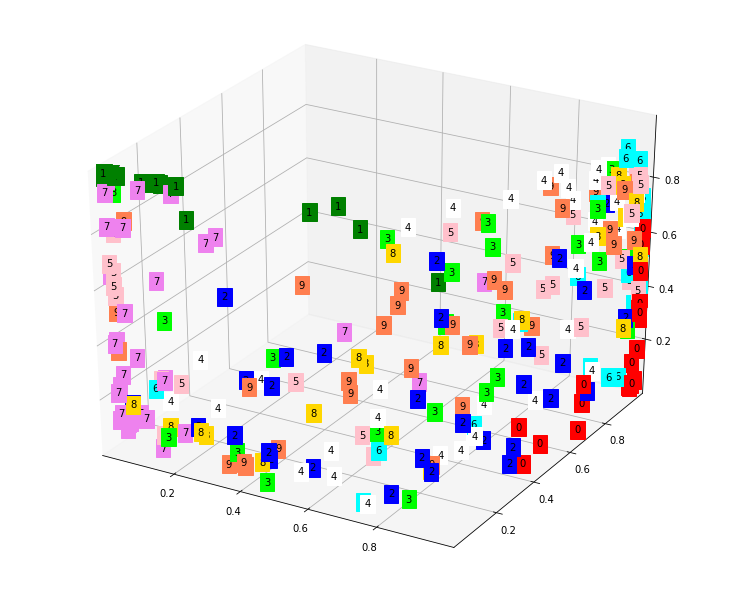

In [53]:
# epoch is 1
# visualize in 3D plot
from pylab import rcParams
rcParams['figure.figsize'] = 10, 8

fig = plt.figure(1)
ax = Axes3D(fig)

xs = latent_vector[:, 0]
ys = latent_vector[:, 1]
zs = latent_vector[:, 2]

color=['red','green','blue','lime','white','pink','aqua','violet','gold','coral']

for x, y, z, label in zip(xs, ys, zs, y_test):
    c = color[int(label)]
    ax.text(x, y, z, label, backgroundcolor=c)
    
ax.set_xlim(xs.min(), xs.max())
ax.set_ylim(ys.min(), ys.max())
ax.set_zlim(zs.min(), zs.max())

plt.show()

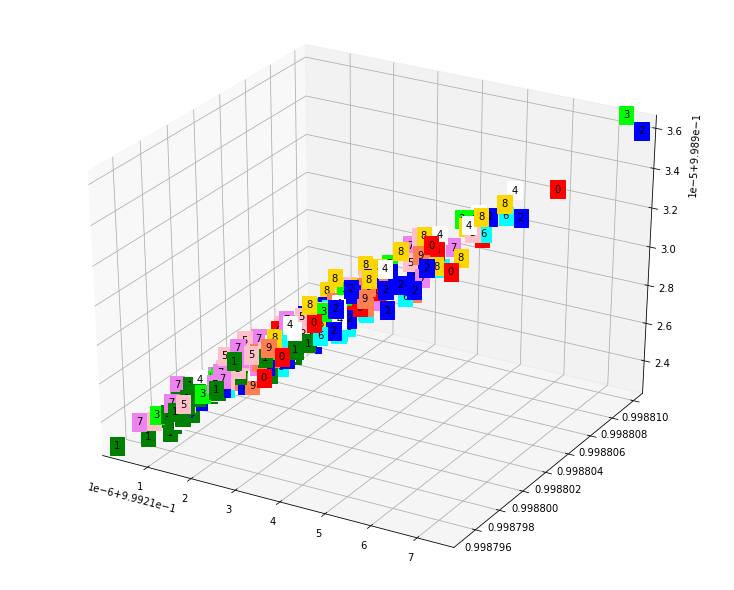

In [61]:
# epoch is 10
# visualize in 3D plot
from pylab import rcParams
rcParams['figure.figsize'] = 10, 8

fig = plt.figure(1)
ax = Axes3D(fig)

xs = latent_vector[:, 0]
ys = latent_vector[:, 1]
zs = latent_vector[:, 2]

color=['red','green','blue','lime','white','pink','aqua','violet','gold','coral']

for x, y, z, label in zip(xs, ys, zs, y_test):
    c = color[int(label)]
    ax.text(x, y, z, label, backgroundcolor=c)
    
ax.set_xlim(xs.min(), xs.max())
ax.set_ylim(ys.min(), ys.max())
ax.set_zlim(zs.min(), zs.max())

plt.show()

# Visualize Reconstructed Images

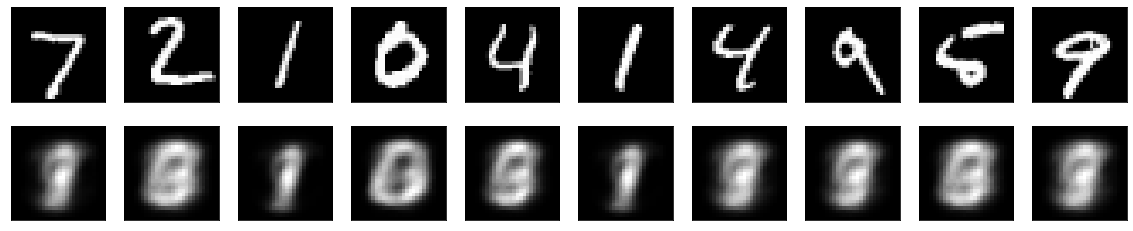

In [54]:
#epoc is 1
n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstructed image
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(reconstructed_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

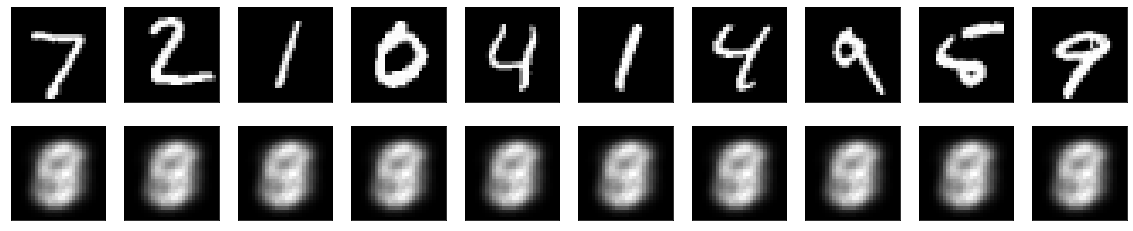

In [62]:
#epoc is 10
n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstructed image
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(reconstructed_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

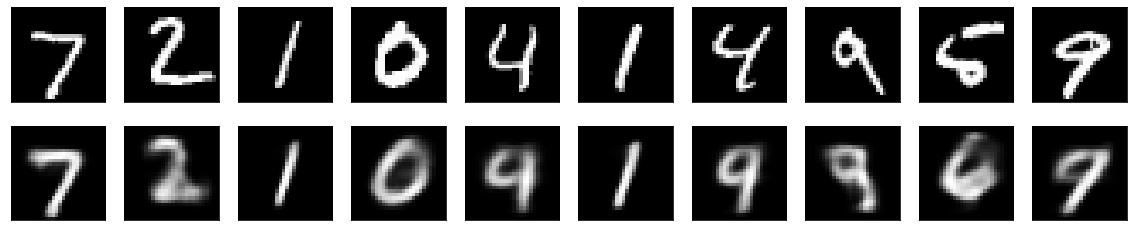

In [33]:
# this epoch is 20
n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstructed image
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(reconstructed_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()